# Phân tích dữ liệu Báo cáo bán hàng từ 01/03/2023 đến 30/06/2023 CỦA CÔNG TY TNHH BARISTA COLLECTIVE

# Khai báo thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Tiền xử lí dữ liệu

***Đọc dữ liệu và lấy hàng đầu tiên làm tên cột***

In [2]:
df = pd.read_excel('/content/drive/MyDrive/MyData/accounting_sale.xlsx', header=1)
df

,Mã hàng,Tên hàng,Nhóm món,Loại món,PTTT,Nguồn,Hoá đơn,Số hoá đơn,Ngày,Giờ,...,Phí ship,Tổng tiền (không bao gồm VAT),Hoa hồng,Tổng tiền (bao gồm hoa hồng),Tên CTKM,Mã voucher,Tên khách,Số khách,Số điện thoại,Tổng tiền
0,ITEM-QZ78,LATTE CARAMEL MACCHIATO,COFFEE,thức uống,ATM,TẠI CHỖ,8J8BB2J5K4V2A4L9I281A57,50500002,02/03/2023,07:24,...,0,5.363600e+04,0,59000,NaN,NaN,NaN,NaN,NaN,59000
1,ITEM-PCYI,CAPPUCCINO,COFFEE,thức uống,ATM,TẠI CHỖ,8J8BB2J5K4V2A4L9I281A57,50500002,02/03/2023,07:24,...,0,5.000000e+04,0,55000,NaN,NaN,NaN,NaN,NaN,55000
2,ITEM-R6OI,COLD,EXTRA,-,ATM,TẠI CHỖ,8J8BB2J5K4V2A4L9I281A57,50500002,02/03/2023,07:24,...,0,0.000000e+00,0,0,NaN,NaN,NaN,NaN,NaN,0
3,ITEM-HSCI,Croissant bơ tỏi,CAKE,đồ ăn,ATM,TẠI CHỖ,8J8BB2J5K4V2A4L9I281A57,50500002,02/03/2023,07:24,...,0,3.545500e+04,0,39000,NaN,NaN,NaN,NaN,NaN,39000
4,ITEM-15VK,Croissant lava chà bông cay,CAKE,đồ ăn,ATM,TẠI CHỖ,8J8BB2J5K4V2A4L9I281A57,50500002,02/03/2023,07:24,...,0,4.090900e+04,0,45000,NaN,NaN,NaN,NaN,NaN,45000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34775,ITEM-HNYC,TRÀ PHÊ BỌT SỮA MUỐI HỒNG (SEA CREAM COFFEE MI...,TEA,thức uống,CASH,TẠI CHỖ,8J8BB2J5K4V2853XCPES5FVE,50500180,26/06/2023,18:46,...,0,5.363600e+04,0,59000,NaN,NaN,NaN,NaN,NaN,59000
34776,ITEM-C9VF,TRÀ CHANH HẠT CHIA (CHIA LEMON TEA),TEA,thức uống,CASH,TẠI CHỖ,8J8BB2J5K4V2TB6Y8M7A11D,50500181,26/06/2023,19:19,...,0,4.090900e+04,0,45000,NaN,NaN,NaN,NaN,NaN,45000
34777,ITEM-YYL1,"""CÀ PHÊ SỮA"" ĐÁ",COFFEE,thức uống,CASH,TẠI CHỖ,8J8BB2J5K4V2TB6Y8M7A11D,50500181,26/06/2023,19:19,...,0,3.181800e+04,0,35000,NaN,NaN,NaN,NaN,NaN,35000
34778,ITEM-E8LH,TRÀ CAM ĐÀO (PEACH SUNRISE TEA),TEA,thức uống,CASH,TẠI CHỖ,8J8BB2J5K4V2TB6YYCKFIIB,50500182,26/06/2023,20:11,...,0,5.363600e+04,0,59000,NaN,NaN,NaN,NaN,NaN,59000


***Xóa hàng cuối cùng***

In [3]:
df.drop(df.index[-1], inplace=True)
df.head()

,Mã hàng,Tên hàng,Nhóm món,Loại món,PTTT,Nguồn,Hoá đơn,Số hoá đơn,Ngày,Giờ,...,Phí ship,Tổng tiền (không bao gồm VAT),Hoa hồng,Tổng tiền (bao gồm hoa hồng),Tên CTKM,Mã voucher,Tên khách,Số khách,Số điện thoại,Tổng tiền
0,ITEM-QZ78,LATTE CARAMEL MACCHIATO,COFFEE,thức uống,ATM,TẠI CHỖ,8J8BB2J5K4V2A4L9I281A57,50500002,02/03/2023,07:24,...,0,53636.0,0,59000,NaN,NaN,NaN,NaN,NaN,59000
1,ITEM-PCYI,CAPPUCCINO,COFFEE,thức uống,ATM,TẠI CHỖ,8J8BB2J5K4V2A4L9I281A57,50500002,02/03/2023,07:24,...,0,50000.0,0,55000,NaN,NaN,NaN,NaN,NaN,55000
2,ITEM-R6OI,COLD,EXTRA,-,ATM,TẠI CHỖ,8J8BB2J5K4V2A4L9I281A57,50500002,02/03/2023,07:24,...,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0
3,ITEM-HSCI,Croissant bơ tỏi,CAKE,đồ ăn,ATM,TẠI CHỖ,8J8BB2J5K4V2A4L9I281A57,50500002,02/03/2023,07:24,...,0,35455.0,0,39000,NaN,NaN,NaN,NaN,NaN,39000
4,ITEM-15VK,Croissant lava chà bông cay,CAKE,đồ ăn,ATM,TẠI CHỖ,8J8BB2J5K4V2A4L9I281A57,50500002,02/03/2023,07:24,...,0,40909.0,0,45000,NaN,NaN,NaN,NaN,NaN,45000


### Các thống kê mô tả về dữ liệu

***Kích thước dữ liệu***

In [4]:
df.shape

(34779, 30)

***Kiểu dữ liệu***

In [5]:
df.dtypes

Mã hàng                           object
Tên hàng                          object
Nhóm món                          object
Loại món                          object
PTTT                              object
Nguồn                             object
Hoá đơn                           object
Số hoá đơn                        object
Ngày                              object
Giờ                               object
Số lượng                         float64
Đơn vị tính                       object
Giá bán                            int64
Thành tiền                       float64
Giảm giá                           int64
Chiết khấu                         int64
Phí hỗ trợ marketing               int64
Phiếu giảm giá                     int64
Phí dịch vụ                        int64
Thuế                               int64
Phí ship                           int64
Tổng tiền (không bao gồm VAT)    float64
Hoa hồng                           int64
Tổng tiền (bao gồm hoa hồng)       int64
Tên CTKM        

***Bảng mô tả***

In [6]:
df.describe()

,Số lượng,Giá bán,Thành tiền,Giảm giá,Chiết khấu,Phí hỗ trợ marketing,Phiếu giảm giá,Phí dịch vụ,Thuế,Phí ship,Tổng tiền (không bao gồm VAT),Hoa hồng,Tổng tiền (bao gồm hoa hồng),Tên khách,Số khách,Số điện thoại,Tổng tiền
count,34779.000000,34779.000000,3.477900e+04,34779.000000,3.477900e+04,34779.0,34779.000000,34779.0,34779.000000,34779.0,3.477900e+04,34779.0,3.477900e+04,0.0,0.0,0.0,3.477900e+04
mean,1.110729,39135.829092,4.456258e+04,25.216366,1.238876e+03,0.0,47.157768,0.0,3936.238161,0.0,3.936225e+04,0.0,4.325133e+04,NaN,NaN,NaN,4.325133e+04
std,0.732554,23870.933135,6.243903e+04,500.105379,2.634349e+04,0.0,588.745284,0.0,4523.782191,0.0,4.523766e+04,0.0,4.975309e+04,NaN,NaN,NaN,4.975309e+04
min,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,NaN,NaN,NaN,0.000000e+00
25%,1.000000,30000.000000,3.000000e+04,0.000000,0.000000e+00,0.0,0.000000,0.0,2727.000000,0.0,2.727300e+04,0.0,3.000000e+04,NaN,NaN,NaN,3.000000e+04
50%,1.000000,45000.000000,4.500000e+04,0.000000,0.000000e+00,0.0,0.000000,0.0,4090.000000,0.0,4.090900e+04,0.0,4.400000e+04,NaN,NaN,NaN,4.400000e+04
75%,1.000000,55000.000000,5.500000e+04,0.000000,0.000000e+00,0.0,0.000000,0.0,5000.000000,0.0,5.000000e+04,0.0,5.500000e+04,NaN,NaN,NaN,5.500000e+04
max,69.000000,269000.000000,7.350000e+06,23600.000000,4.655000e+06,0.0,22000.000000,0.0,282273.000000,0.0,2.822727e+06,0.0,3.105000e+06,NaN,NaN,NaN,3.105000e+06


> Nhận thấy qua bảng mô tả, các cột: **Phí hỗ trợ marketing**, **Phí dịch vụ**, **Phí ship**, **Hoa hồng** là các cột chứa tất cả đều là giá trị 0 nên bỏ các cột này vì không thể sử dụng để phân tích.

> Các cột: **Tên khách**, **Số khách**, **Số điện thoại** chứa giá trị bị thiếu (có thể là để bảo mật thông tin khách hàng) nên ta cũng xóa các cột này khỏi dataframe.

In [7]:
df.drop(columns = ['Phí hỗ trợ marketing ', 'Phí dịch vụ', 'Phí ship', 'Hoa hồng', 'Tên khách', 'Số khách', 'Số điện thoại'], axis=1, inplace=True)

### Dữ liệu bị thiếu

In [8]:
missing_data = pd.DataFrame({'Tổng dữ liệu bị thiếu': df.isnull().sum(), 'Phần trăm dữ liệu bị thiếu': (df.isnull().sum()/df.shape[0])*100})
missing_data

,Tổng dữ liệu bị thiếu,Phần trăm dữ liệu bị thiếu
Mã hàng,0,0.000000
Tên hàng,0,0.000000
Nhóm món,0,0.000000
Loại món,0,0.000000
PTTT,0,0.000000
Nguồn,0,0.000000
Hoá đơn,0,0.000000
Số hoá đơn,0,0.000000
Ngày,0,0.000000
Giờ,0,0.000000


> Có 2 cột chứa dữ liệu bị thiếu là **Tên CTKM**, **Mã voucher**.

> **Tên CTKM**, **Mã voucher** ít được sử dụng trong cửa hàng nên chứa nhiều dữ liệu thiếu. Các cột này ta sẽ không dùng tới để phân tích nên xóa đi.

In [9]:
df.drop(columns = ['Tên CTKM', 'Mã voucher'], axis=1, inplace=True)

# Phân tích dữ liệu

In [10]:
df.head()

,Mã hàng,Tên hàng,Nhóm món,Loại món,PTTT,Nguồn,Hoá đơn,Số hoá đơn,Ngày,Giờ,...,Đơn vị tính,Giá bán,Thành tiền,Giảm giá,Chiết khấu,Phiếu giảm giá,Thuế,Tổng tiền (không bao gồm VAT),Tổng tiền (bao gồm hoa hồng),Tổng tiền
0,ITEM-QZ78,LATTE CARAMEL MACCHIATO,COFFEE,thức uống,ATM,TẠI CHỖ,8J8BB2J5K4V2A4L9I281A57,50500002,02/03/2023,07:24,...,LY,59000,59000.0,0,0,0,5364,53636.0,59000,59000
1,ITEM-PCYI,CAPPUCCINO,COFFEE,thức uống,ATM,TẠI CHỖ,8J8BB2J5K4V2A4L9I281A57,50500002,02/03/2023,07:24,...,LY,55000,55000.0,0,0,0,5000,50000.0,55000,55000
2,ITEM-R6OI,COLD,EXTRA,-,ATM,TẠI CHỖ,8J8BB2J5K4V2A4L9I281A57,50500002,02/03/2023,07:24,...,PHAN,0,0.0,0,0,0,0,0.0,0,0
3,ITEM-HSCI,Croissant bơ tỏi,CAKE,đồ ăn,ATM,TẠI CHỖ,8J8BB2J5K4V2A4L9I281A57,50500002,02/03/2023,07:24,...,PHAN,39000,39000.0,0,0,0,3545,35455.0,39000,39000
4,ITEM-15VK,Croissant lava chà bông cay,CAKE,đồ ăn,ATM,TẠI CHỖ,8J8BB2J5K4V2A4L9I281A57,50500002,02/03/2023,07:24,...,PHAN,45000,45000.0,0,0,0,4091,40909.0,45000,45000


***Top 10 mặt hàng bán chạy nhất của quán***

In [11]:
top10_best = df['Tên hàng'].value_counts().head(10)
top10_best

"CÀ PHÊ SỮA" ĐÁ                           3768
"CÀ PHÊ ĐEN" ĐÁ                           2761
"BẠC XỈU" ĐÁ                              2382
BỮA TRƯA NO NÊ                            2330
TRÀ TẮC XÍ MUỘI                           1584
TRÀ CHANH HẠT CHIA (CHIA LEMON TEA)       1124
TRÀ CAM ĐÀO (PEACH SUNRISE TEA)           1106
CÀ PHÊ SỮA BÉO - 50/50 CREAMY COFFEE      1018
BÁNH MÌ XÍU MẠI                            919
TRÀ LÀI CHANH VÀNG (LEMON JASMINE TEA)     751
Name: Tên hàng, dtype: int64

***Top 10 mặt hàng bán ít nhất của quán***

In [12]:
top10_low = df['Tên hàng'].value_counts().tail(10)
top10_low

"CÀ PHÊ LATTE YẾN MẠCH" ĐÁ      2
MÌ THÊM (MÌ XÀO)                1
"CÀ PHÊ LATTE YẾN MẠCH" NÓNG    1
MOUSSE CORN                     1
CALAMANADE ICED-BLENDED         1
Phong workshop 200k             1
MOCHA                           1
PHÒNG BOOKING                   1
NUOC SUOI LAVIE                 1
ESPRESSO                        1
Name: Tên hàng, dtype: int64

***Tổng doanh thu theo ngày***

In [13]:
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')
df['Ngày cụ thể'] = df['Ngày'].dt.date
dately_revenue = df.groupby('Ngày cụ thể')['Tổng tiền'].sum()
dately_revenue

Ngày cụ thể
2023-03-02    13963200
2023-03-03    13200800
2023-03-04    15544000
2023-03-05     9883400
2023-03-06    10578250
                ...   
2023-06-22    13797800
2023-06-23    13525900
2023-06-24     8998400
2023-06-25    11071800
2023-06-26    13695800
Name: Tổng tiền, Length: 114, dtype: int64

In [14]:
#Các ngày trong tháng 3
march_revenue = dately_revenue[dately_revenue.index.to_series().apply(lambda x: x.month) == 3]
march_revenue

Ngày cụ thể
2023-03-02    13963200
2023-03-03    13200800
2023-03-04    15544000
2023-03-05     9883400
2023-03-06    10578250
2023-03-07    14006550
2023-03-08    44220950
2023-03-09     8757900
2023-03-10    11276200
2023-03-11    11555800
2023-03-12    13341400
2023-03-13    11380000
2023-03-14    12019650
2023-03-15    11023400
2023-03-16    12306700
2023-03-17    12849600
2023-03-18    10859200
2023-03-19     9692600
2023-03-20    11696100
2023-03-21    11760900
2023-03-22    12418600
2023-03-23    11646200
2023-03-24    13948800
2023-03-25    16262200
2023-03-26     9889950
2023-03-27    11285600
2023-03-28    11675600
2023-03-29    12885200
2023-03-30    17391950
2023-03-31    13998800
Name: Tổng tiền, dtype: int64

In [15]:
#Các ngày trong tháng 4
april_revenue = dately_revenue[dately_revenue.index.to_series().apply(lambda x: x.month) == 4]
april_revenue

Ngày cụ thể
2023-04-01    10349400
2023-04-02     9295000
2023-04-03    13697600
2023-04-04    14402800
2023-04-05    13437650
2023-04-06    11110600
2023-04-07    12179200
2023-04-08    11962600
2023-04-09     9281400
2023-04-10    10208100
2023-04-11    13379200
2023-04-12    14818000
2023-04-13    12159400
2023-04-14    13031600
2023-04-15     9455400
2023-04-16     9337500
2023-04-17    12654600
2023-04-18    13473400
2023-04-19    14686600
2023-04-20    15957400
2023-04-21    13311800
2023-04-22    14380000
2023-04-23    11459000
2023-04-24    16542200
2023-04-25    15821600
2023-04-26    13647600
2023-04-27    13455500
2023-04-28    12451700
Name: Tổng tiền, dtype: int64

In [16]:
#Các ngày trong tháng 5
may_revenue = dately_revenue[dately_revenue.index.to_series().apply(lambda x: x.month) == 5]
may_revenue

Ngày cụ thể
2023-05-02     6936600
2023-05-03     6058800
2023-05-04    12722400
2023-05-05    14011400
2023-05-06     8181000
2023-05-07    11556600
2023-05-08    14839400
2023-05-09    14245800
2023-05-10    15131300
2023-05-11    16441400
2023-05-12    13985600
2023-05-13    17778000
2023-05-14     9885500
2023-05-15    13581900
2023-05-16    12955400
2023-05-17    14703600
2023-05-18    13982900
2023-05-19    13226900
2023-05-20    13533300
2023-05-21     7514000
2023-05-22    14615550
2023-05-23    14952300
2023-05-24    13443900
2023-05-25    14767600
2023-05-26    14366300
2023-05-27     8535650
2023-05-28    14106100
2023-05-29    14984200
2023-05-30    12985700
2023-05-31    14485300
Name: Tổng tiền, dtype: int64

In [17]:
#Các ngày trong tháng 6
june_revenue = dately_revenue[dately_revenue.index.to_series().apply(lambda x: x.month) == 6]
june_revenue

Ngày cụ thể
2023-06-01    17863000
2023-06-02    17449250
2023-06-03     9059600
2023-06-04     9103200
2023-06-05    16392550
2023-06-06    13219900
2023-06-07    15750600
2023-06-08    12659100
2023-06-09    13735000
2023-06-10    14882990
2023-06-11     9952400
2023-06-12    14554100
2023-06-13    16528890
2023-06-14    15817200
2023-06-15    15021500
2023-06-16    16061900
2023-06-17    10713100
2023-06-18    10175700
2023-06-19    13400900
2023-06-20    16846400
2023-06-21    18180300
2023-06-22    13797800
2023-06-23    13525900
2023-06-24     8998400
2023-06-25    11071800
2023-06-26    13695800
Name: Tổng tiền, dtype: int64

***Tổng doanh thu theo tháng***

In [18]:
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')
df['Tháng'] = df['Ngày'].dt.month
monthly_revenue = df.groupby('Tháng')['Tổng tiền'].sum()
monthly_revenue

Tháng
3    401319500
4    355946850
5    388514400
6    358457280
Name: Tổng tiền, dtype: int64

***Số lượng khách hàng theo tháng***

In [19]:
num_custom = df.groupby(['Hoá đơn', 'Tháng']).size().reset_index(name='Số lượng khách hàng')
num_custom = num_custom.groupby('Tháng').count()['Số lượng khách hàng'].reset_index()
num_custom

,Tháng,Số lượng khách hàng
0,3,4309
1,4,4407
2,5,4768
3,6,4273


***Phương thức thanh toán***

In [20]:
PTTT = df['PTTT'].value_counts()
PTTT

CASH           18581
ATM             8970
TRANSFER        4195
MOMO            2703
GRAB_FOOD        194
SHOPEE_FOOD       81
GOFOOD            24
SHOPEEFOOD        13
BAEMIN            13
PAYOO              5
Name: PTTT, dtype: int64

> Vì SHOPEE_FOOD và SHOPEEFOOD là 1 nên tiến hành gộp

In [21]:
PTTT['SHOPEE_FOOD'] = PTTT['SHOPEE_FOOD'] + PTTT['SHOPEEFOOD']
PTTT.drop(['SHOPEEFOOD'])

CASH           18581
ATM             8970
TRANSFER        4195
MOMO            2703
GRAB_FOOD        194
SHOPEE_FOOD       94
GOFOOD            24
BAEMIN            13
PAYOO              5
Name: PTTT, dtype: int64

***Khách sử dụng dịch vụ nào?***

In [22]:
DV = df['Nguồn'].value_counts()
DV

TẠI CHỖ           34753
MANG VỀ              16
GOJEK (GOVIET)       10
Name: Nguồn, dtype: int64

***Khách sử dụng nhóm món nào?***

In [37]:
LM = df['Nhóm món'].value_counts()
LM

COFFEE                              12073
TEA                                  7413
ĐỒ ĂN TRƯA                           4403
Combo                                3039
ICED- BLENDED, SMOOTHIES & JUICE     2204
CAKE                                 1926
ĐỒ ĂN SÁNG                           1824
EXTRA                                1139
COLD BREW                             663
PHÒNG BOOKING                          43
MERCHANDISE                            40
UnCategory                             12
Name: Nhóm món, dtype: int64

***Top 10 khách hàng tiềm năng***

In [24]:
custom_revenue = df.groupby('Hoá đơn')['Tổng tiền'].sum()
custom_revenue.sort_values(ascending=False).head(10)

Hoá đơn
8J8BB2J5K4V2DXIY10E0NUR     7611000
8J8BB2J5K4V2336T5OQ707AV    6116000
8J8BB2J5K4V22BHS0CM01H3     5286000
8J8BB2J5K4V23RJIOAKI9T      5097000
8J8BB2J5K4V227BRCPMB07S     3976000
8J8BB2J5K4V2336T62SI60UV    3892000
8J8BB2J5K4V2IW51ZO2729M     3853000
8J8BB2J5K4V2IQ6V61Q1E68     3723000
8J8BB2J5K4V2336T5012FLGA    3336000
8J8BB2J5K4V2336T72DOOEX6    3105000
Name: Tổng tiền, dtype: int64

> Với dữ liệu ban đầu đã cho không có thông tin của khách hàng nên sử dụng mã hóa đơn để tượng trưng cho khách hàng. Quý doanh nghiệp có thể cung cấp mã khách hàng để tìm ra các khách hàng tìm năng của quán. Từ đó, áp dụng các ưu đãi đặc biệt đối với khách hàng tiềm năng.

***Sau khi xử lí và phân tích xong, xuất file csv để tạo dashboard***

In [36]:
#pd.DataFrame(df).to_csv('data_processed.csv')

# Trực quan hóa dữ liệu

***Top 10 tên món hàng bán chạy nhất của quán***

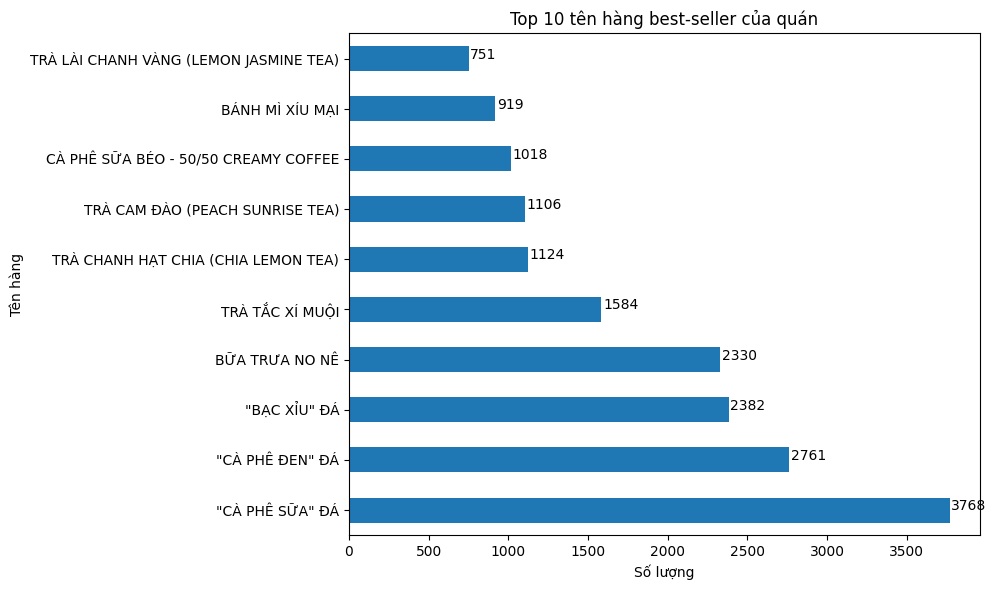

In [25]:
# Trực quan hóa thành biểu đồ cột
plt.figure(figsize=(10, 6))
ax = top10_best.plot(kind='barh')
plt.xlabel('Số lượng')
plt.ylabel('Tên hàng')
plt.title('Top 10 tên hàng best-seller của quán')

# Thêm nhãn số lượng lên mỗi cột
for i, v in enumerate(top10_best):
    ax.text(v + 10, i, str(v), color='black')

plt.tight_layout()
plt.show()

***Biểu đồ doanh thu theo ngày - tháng 3***

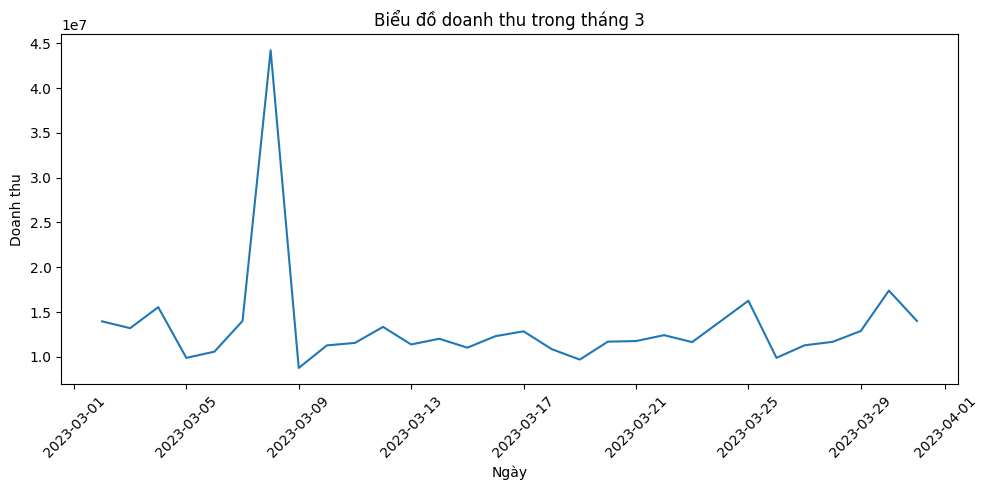

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(march_revenue.index, march_revenue.values)
plt.xlabel('Ngày')
plt.ylabel('Doanh thu')
plt.title('Biểu đồ doanh thu trong tháng 3')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Biểu đồ doanh thu theo ngày - tháng 4***

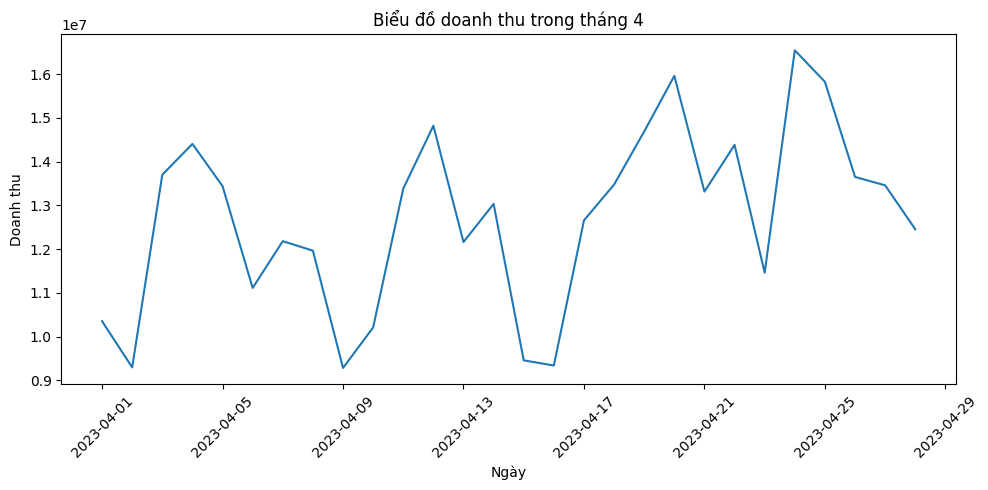

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(april_revenue.index, april_revenue.values)
plt.xlabel('Ngày')
plt.ylabel('Doanh thu')
plt.title('Biểu đồ doanh thu trong tháng 4')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Biểu đồ doanh thu theo ngày - tháng 5***

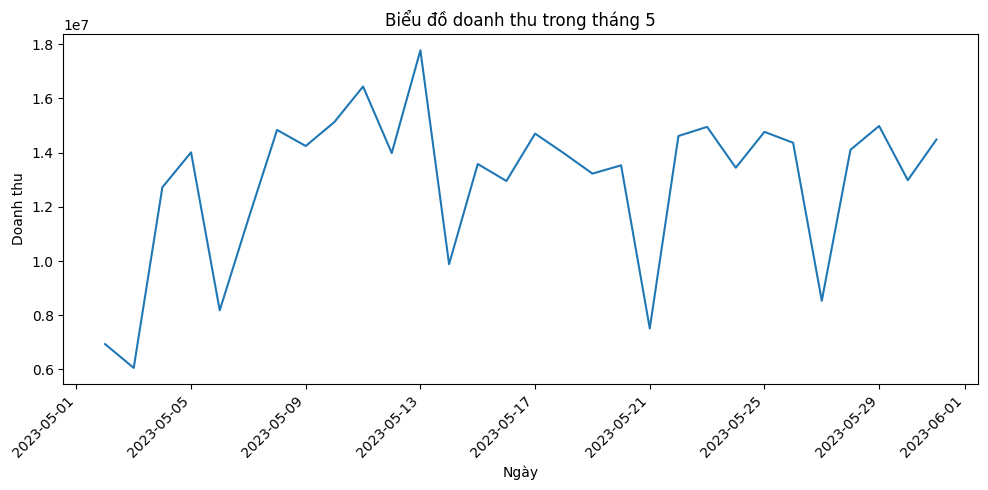

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(may_revenue.index, may_revenue.values)
plt.xlabel('Ngày')
plt.ylabel('Doanh thu')
plt.title('Biểu đồ doanh thu trong tháng 5')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

***Biểu đồ doanh thu theo ngày - tháng 6***

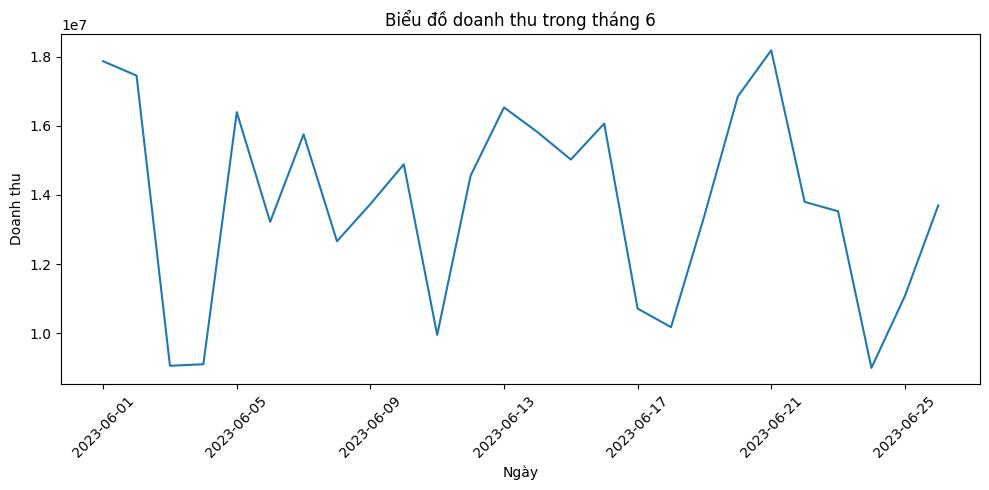

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(june_revenue.index, june_revenue.values)
plt.xlabel('Ngày')
plt.ylabel('Doanh thu')
plt.title('Biểu đồ doanh thu trong tháng 6')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Biểu đồ doanh thu theo tháng***

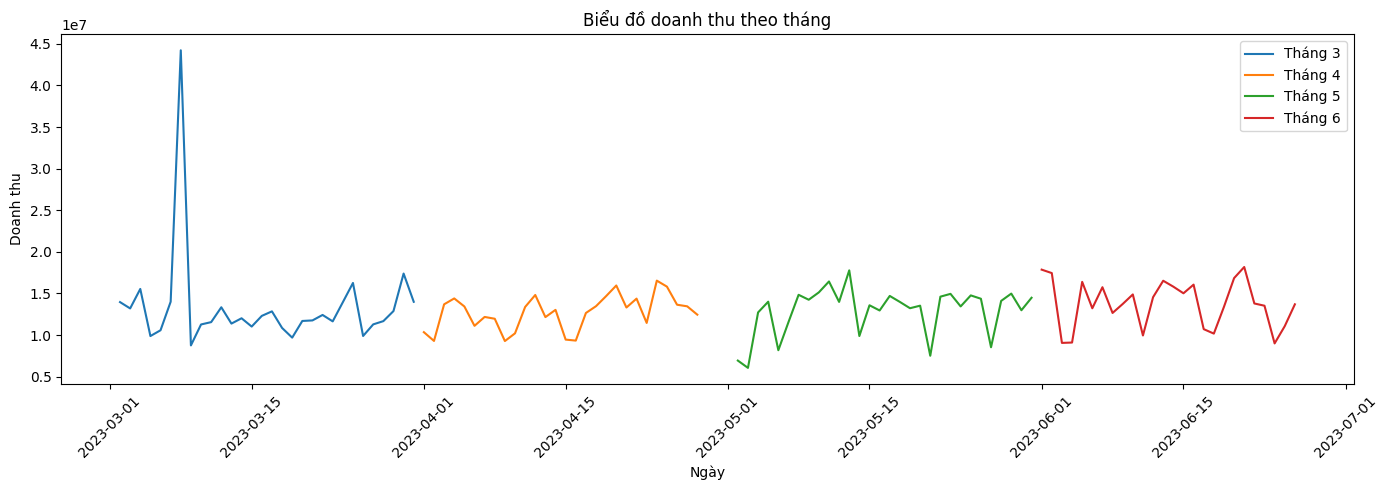

In [30]:
# Vẽ biểu đồ đường cho từng tháng
plt.figure(figsize=(14, 5))
plt.plot(march_revenue.index, march_revenue.values, label='Tháng 3')
plt.plot(april_revenue.index, april_revenue.values, label='Tháng 4')
plt.plot(may_revenue.index, may_revenue.values, label='Tháng 5')
plt.plot(june_revenue.index, june_revenue.values, label='Tháng 6')

plt.xlabel('Ngày')
plt.ylabel('Doanh thu')
plt.title('Biểu đồ doanh thu theo tháng')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

***Biểu đồ tròn phương thức thanh toán***

> Vì các PTTT như **GRAB_FOOD**, **SHOPEE_FOOD**, **GOFOOD**, **BAEMIN**, **PAYOO** chiếm số lượng ít cho nên khi vẽ biểu đồ tròn sẽ xảy ra hiện tượng chồng chữ. Giải pháp là gộp chung thành một tập là tổng giá trị của **GRAB_FOOD**, **SHOPEE_FOOD**, **GOFOOD**, **BAEMIN**, **PAYOO**.

In [31]:
PTTT.at['Khác'] = PTTT[['GRAB_FOOD', 'SHOPEE_FOOD', 'GOFOOD', 'SHOPEEFOOD', 'BAEMIN', 'PAYOO']].sum()
PTTT = PTTT.drop(['GRAB_FOOD', 'SHOPEE_FOOD', 'GOFOOD', 'SHOPEEFOOD', 'BAEMIN', 'PAYOO'])
PTTT

CASH        18581
ATM          8970
TRANSFER     4195
MOMO         2703
Khác          343
Name: PTTT, dtype: int64

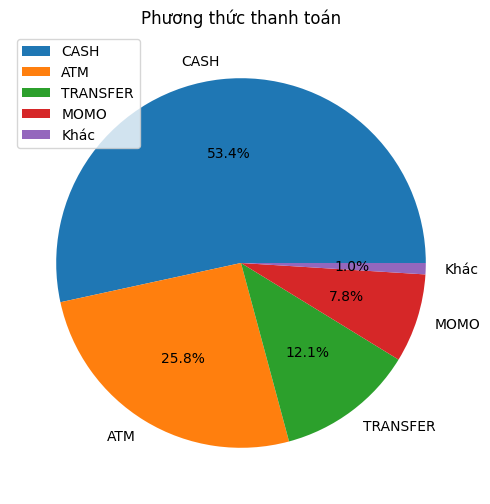

In [32]:
# Vẽ biểu đồ tròn
plt.figure(figsize=(15, 6))
plt.pie(PTTT.values, labels=PTTT.index, autopct='%1.1f%%')
plt.title('Phương thức thanh toán')
plt.legend(loc='best')
plt.show()

***Biểu đồ tròn loại hình dịch vụ***

In [33]:
LM.at['Khác'] = LM[['COLD BREW ', 'PHÒNG BOOKING', 'MERCHANDISE', 'UnCategory']].sum()
LM = LM.drop(['COLD BREW ', 'PHÒNG BOOKING', 'MERCHANDISE', 'UnCategory'])
LM

COFFEE                              12073
TEA                                  7413
ĐỒ ĂN TRƯA                           4403
Combo                                3039
ICED- BLENDED, SMOOTHIES & JUICE     2204
CAKE                                 1926
ĐỒ ĂN SÁNG                           1824
EXTRA                                1139
Khác                                  758
Name: Nhóm món, dtype: int64

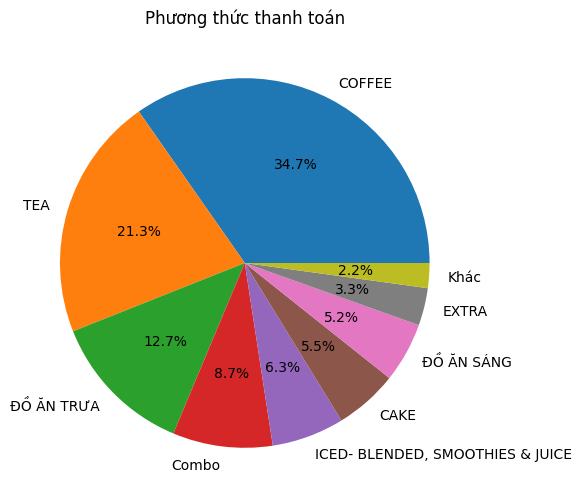

In [34]:
# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))
plt.pie(LM.values, labels=LM.index, autopct='%1.1f%%')
plt.title('Phương thức thanh toán')

plt.show()